In [37]:
from linares_plot import *
import os

In [38]:
def circdist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)



def decoding_spikes_angles_err(df, size_test=0.1):
    #### Input : dataframe with three columns: (spikes, behaviour and neuron label)
    ###Take off nans
    df = df.loc[df.iloc[:,0]<9999]
    df.columns=['spikes', 'beh', 'neuron']
    neuron_means=[]
    ### Train and test on the same neuron --> append the error of each neuron
    pop_err=[]
    
    for Neur in df.neuron.unique():
        ### same neuron 5 times --> mean value
        neur_err=[]
        for rep in range(0,5):
            spikes_train, spikes_test, beh_train, beh_test = train_test_split(df.groupby('neuron').get_group(Neur)['spikes'],
                                                                              df.groupby('neuron').get_group(Neur)['beh'],
                                                                              test_size=size_test)  

            ######## Trainning #########
            ## X matrix (intercept and spikes)
            X = np.column_stack([np.ones(np.shape(spikes_train)[0]),spikes_train])
            ## Y (sinus and cos)
            sinus =np.sin([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
            cosinus = np.cos([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
            Y = np.column_stack([cosinus, sinus])
            ### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
            Y = Y.astype(float) #to make it work in the cluster
            X = X.astype(float)
            model = sm.OLS(Y, X)
            ##train the model
            fit=model.fit()

            ######### Testing ###########
            X = np.column_stack([np.ones(np.shape(spikes_test)[0]),spikes_test])
            p = fit.predict(X)
            x = p[:,0]
            y = p[:,1]
            #####
            ##### Error --> take the resulting vector in sin/cos space
            ### from sin and cos get the angle (-pi, pi)
            #pred_angle = [ np.degrees(np.arctan2(y[i], x[i]) + np.pi) for i in range(0, len(y))]
            pred_angle = [ np.degrees(np.arctan2(y[i], x[i])) for i in range(0, len(y))]
            for i in range(0, len(pred_angle)):
                if pred_angle[i]<0:
                    pred_angle[i]=360+pred_angle[i]
            ##
            #error=[ circdist(beh_test[i], pred_angle[i]) for i in range(0, len(pred_angle))]
            error=[ circdist(beh_test.values[i], pred_angle[i]) for i in range(0, len(pred_angle))]
            
            #low_value --> predicted positionns close to real
            neur_err.append(np.mean(error))
            ####
        
        #####       
        pop_err.append(np.mean(neur_err))
        ####
    
    return pop_err




In [50]:
path_CTD = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\CTD'


In [51]:
pfc_100 = pd.read_excel( os.path.join(path_CTD, 'pfc_100.xlsx'))
pfc_200 = pd.read_excel( os.path.join(path_CTD, 'pfc_200.xlsx'))
pfc_300 = pd.read_excel( os.path.join(path_CTD, 'pfc_300.xlsx'))
pfc_900 = pd.read_excel( os.path.join(path_CTD, 'pfc_900.xlsx'))

In [52]:
lip_100 = pd.read_excel( os.path.join(path_CTD, 'lip_100.xlsx'))
lip_200 = pd.read_excel( os.path.join(path_CTD, 'lip_200.xlsx'))
lip_300 = pd.read_excel( os.path.join(path_CTD, 'lip_300.xlsx'))
lip_900 = pd.read_excel( os.path.join(path_CTD, 'lip_900.xlsx'))

In [41]:
df.targetloc.unique()

array([7, 5, 1, 0, 4, 2, 6, 3], dtype=int64)

In [42]:
import statsmodels.api as sm

def circdist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)

def cross_decoding_spikes_angles_err_all(df_train, df_test):
    #### Input : dataframe with three columns: (spikes, behaviour and neuron label)
    ###Take off nans
    #df_train = df_train.loc[df_train.iloc[:,0]<9999]
    df_train.columns=['spikes', 'beh', 'neuron']
    #df_test = df_test.loc[df_test.iloc[:,0]<9999]
    df_test.columns=['spikes', 'beh', 'neuron']
    
    ## Train and test on the same neuron --> append the error of each neuron
    population_err=[]
    
    for Neur in df_train.neuron.unique():
        
        ### same neuron 20 times --> mean value        
        spikes_train= df_train.groupby('neuron').get_group(Neur)['spikes'].values
        spikes_test= df_test.groupby('neuron').get_group(Neur)['spikes'].values
        beh_train= df_train.groupby('neuron').get_group(Neur)['beh'].values
        beh_test= df_test.groupby('neuron').get_group(Neur)['beh'].values

        ######## Trainning #########
        ## X matrix (intercept and spikes)
        X = np.column_stack([np.ones(np.shape(spikes_train)[0]),spikes_train])
        ## Y (sinus and cos)
        sinus =np.sin([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
        cosinus = np.cos([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
        Y = np.column_stack([cosinus, sinus])
        ### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
        model = sm.OLS(Y, X)
        ##train the model
        fit=model.fit()

        ######### Testing ###########
        X = np.column_stack([np.ones(np.shape(spikes_test)[0]),spikes_test])
        p = fit.predict(X)
        x = p[:,0]
        y = p[:,1]
        #####
        ##### Error --> take the resulting vector in sin/cos space
        ### from sin and cos get the angle (-pi, pi)
        #pred_angle = [ np.degrees(np.arctan2(y[i], x[i]) + np.pi) for i in range(0, len(y))]
        pred_angle = [ np.degrees(np.arctan2(y[i], x[i])) for i in range(0, len(y))]
        for i in range(0, len(pred_angle)):
            if pred_angle[i]<0:
                pred_angle[i]=360+pred_angle[i]
        ##
        #
        #print(beh_test)
        error=[ circdist(beh_test[i], pred_angle[i]) for i in range(0, len(pred_angle))]

        #low_value --> predicted positionns close to real
        population_err.append(np.mean(error))
        ######
    
    return population_err

In [43]:
df.neuron.unique()


array([  1367701,   1367802,   1367903,   1369702,   1369901,   1370002,
         1370202,   1371202,   1371901,   1372003,   1372301,   1372402,
       189168701, 189169502, 189171003, 189171602, 189172801, 189173101,
       189173801, 189174201, 189175201, 189175801, 189176101, 189176501,
       189176901, 189177402, 189177701,   1891783, 189179001, 189179002,
         1891793, 189179702, 189180001, 189181001, 189181502,   1891819,
       189182202, 189182501, 189182901, 189183201, 189183402,   1891841,
       189184601,   1891857, 189186201, 189187301, 189188901, 189189601,
       189191601, 189191602,   1891918, 189192001, 189192201, 189192401,
         1891935, 189194301, 189195301, 189196301, 189196401, 189209101,
       189209503, 189210001, 189210901], dtype=int64)

In [49]:
df1 = df.loc[(df['times']==500) & (df['neuron']==1367701), ['firing', 'target_angle', 'neuron']] ###tiene que ser centered!
df2 = df.loc[(df['times']==600) & (df['neuron']==1367701), ['firing', 'target_angle', 'neuron']] ###tiene que ser centered!
cross_decoding_spikes_angles_err_all(df1, df2)

[60.657331230582926]

In [ ]:
### cambiar la funcion para que sea en cada neurona (asi poder identificar subpoblaciones)
### buscar en internet como hacer eso? PCA???
### idea! tres fits diferentes! compararlos en cada neurona! :)


In [57]:
def decoder_n(df_train, df_test):
    #### Input : dataframe with three columns: (spikes, behaviour and neuron label)
    df_train.columns=['firing', 'beh']
    df_test.columns=['firing', 'beh']
    
    ## Train and test         
    activity_train= df_train.firing.values
    activity_test= df_test.firing.values
    beh_train= df_train.beh.values
    beh_test= df_test.beh.values

    ######## Trainning #########
    ## X matrix (intercept and spikes)
    X = np.column_stack([np.ones(np.shape(activity_train)[0]), activity_train])
    ## Y (sinus and cos)
    sinus =np.sin([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
    cosinus = np.cos([np.radians(np.array(beh_train)[i]) for i in range(0, len(beh_train))])
    Y = np.column_stack([cosinus, sinus])
    ### one OLS for sin and cos: output: beta of intercetp and bea of spikes (two B intercepts and 2 B for spikes )
    model = sm.OLS(Y, X)
    ##train the model
    fit=model.fit()

    ######### Testing ###########
    X = np.column_stack([np.ones(np.shape(activity_test)[0]),activity_test])
    p = fit.predict(X)
    x = p[:,0]
    y = p[:,1]
    #####
    ##### Error --> take the resulting vector in sin/cos space
    ### from sin and cos get the angle (-pi, pi)
    #pred_angle = [ np.degrees(np.arctan2(y[i], x[i]) + np.pi) for i in range(0, len(y))]
    pred_angle = [ np.degrees(np.arctan2(y[i], x[i])) for i in range(0, len(y))]
    for i in range(0, len(pred_angle)):
        if pred_angle[i]<0:
            pred_angle[i]=360+pred_angle[i]
    ##
    #
    #print(beh_test)
    error_trial=[ circdist(beh_test[i], pred_angle[i]) for i in range(0, len(pred_angle))]
    mean_error = np.round(np.mean(error_trial),2)

    return mean_error

In [58]:
df1 = df.loc[(df['times']==500) & (df['neuron']==1367701), ['firing', 'target_angle']] ###tiene que ser centered!
df2 = df.loc[(df['times']==600) & (df['neuron']==1367701), ['firing', 'target_angle']] ###tiene que ser centered!
decoder_n(df1, df2)

60.66

In [63]:
df['times_centered'] = df['times'] - df['fixationtime']

In [64]:
df.loc[df['neuron']==1367701, ['firing', 'target_angle', 'times_centered']]

,firing,target_angle,times_centered
0,-3.637979e-19,225,-300
1,1.382432e-17,225,-200
2,1.127773e-17,225,-100
3,2.691904e-03,225,0
4,1.751611e-02,225,100
...,...,...,...
2242,1.003299e-02,315,800
2243,2.412903e-02,315,900
2244,1.087097e-02,315,1000
2245,3.434188e-06,315,1100


In [68]:
dfn = df.loc[df['neuron']==1367701]
dfn.loc[(dfn['times_centered']>-500) & (dfn['times_centered']<2000) ]
dfn.head()

,Unnamed: 0,firing,times,trial,TDOA,TDconf,targetloc,distLoc,fixationtime,failed,saccadeChoice,monkey,neuron,brain_region,rf_loc,target_angle,times_centered
0,0,-3.637979e-19,0,2,0,3,7,0,300,1,7,Mojo,1367701,DLPFC,270,225,-300
1,1,1.382432e-17,100,2,0,3,7,0,300,1,7,Mojo,1367701,DLPFC,270,225,-200
2,2,1.127773e-17,200,2,0,3,7,0,300,1,7,Mojo,1367701,DLPFC,270,225,-100
3,3,2.691904e-03,300,2,0,3,7,0,300,1,7,Mojo,1367701,DLPFC,270,225,0
4,4,1.751611e-02,400,2,0,3,7,0,300,1,7,Mojo,1367701,DLPFC,270,225,100


In [75]:
from joblib import Parallel, delayed
import multiprocessing
numcores = multiprocessing.cpu_count() - 1
numcores

7

In [134]:
list_times_sorted

array([-500, -400, -300, -200, -100,    0,  100,  200,  300,  400,  500,
        600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
       1700], dtype=int64)

In [138]:
#cross-decoding for 1 neuron
all_times = np.arange(-500,2100, 100)
train_test = np.empty( (len(all_times), len(all_times) ) )
train_test[:] = np.nan


dfn = df.loc[df['neuron']==1367701]
dfn = dfn.loc[(dfn['times_centered']>=-500) & (dfn['times_centered']<=2000) ]
list_times = dfn.times_centered.unique()
list_times_sorted =np.sort(list_times)
list_times_sorted

for training_time in list_times_sorted:
    print(training_time)
    dfn_train = dfn.loc[(dfn['times_centered']==training_time), ['firing', 'target_angle']]
    paralel_train = [dfn_train for i in range(len(list_times_sorted))]
    
    paralel_test = []
    for times_testing in list_times_sorted:
        dfn_test =dfn.loc[(dfn['times_centered']==times_testing), ['firing', 'target_angle']]
        paralel_test.append(dfn_test)

    cross_temp = Parallel(n_jobs = numcores)(delayed(decoder_n)(training, testing)  for training, testing in zip(paralel_train, paralel_test) )   #### reconstruction standard (paralel)

    idx_append_row = np.where(training_time == all_times )[0][0]
    idx_append_col1 = np.where(list_times_sorted[0] == all_times)[0][0]
    idx_append_col2 = np.where(list_times_sorted[-1] == all_times)[0][0]
    train_test[idx_append_row, idx_append_col1:idx_append_col2+1] = cross_temp


-500
-400
-300
-200
-100
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [147]:
def heatmap(data, title, dist_time='None', fs1=20, fs2=12):
    ax = sns.heatmap(data,vmin=50, vmax=90, cmap= 'viridis_r',
                    cbar_kws={"shrink": .82, 'ticks' : [50, 70, 90], 'label': 'decoding error ($^\circ$)'}) ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(fs1)
    ax.figure.axes[-1].tick_params(labelsize=fs2)
    plt.gca().set_title(title, fontsize=fs1)
    plt.gca().set_xticks([0,5,10,15,20])
    plt.gca().set_xticklabels([-500,0,500,1000,1500])
    plt.gca().set_ylim(0,24)
    plt.gca().set_yticks([0,5,10,15,20])
    plt.gca().set_yticklabels([-500,0,500,1000,1500])
    plt.xticks(fontsize=fs2, rotation=0)
    plt.yticks(fontsize=fs2)
    plt.gca().set_ylabel('training time (ms)', fontsize=fs1, labelpad=12)
    plt.gca().set_xlabel('testing time (ms)', fontsize=fs1, labelpad=12)
    ##### Target presented at 500ms
    ##### Stimulus duration: 100ms
    ##### Distractor presented with different SOA
    plt.plot([500/100, 500/100], [23,23], markersize=10, color='y', marker='v')
    if dist_time != 'None':
        plt.plot([(600+dist_time)/100, (600+dist_time)/100], [23,23], markersize=10, color='r', marker='v')
                
    
    plt.show(block=False)
    

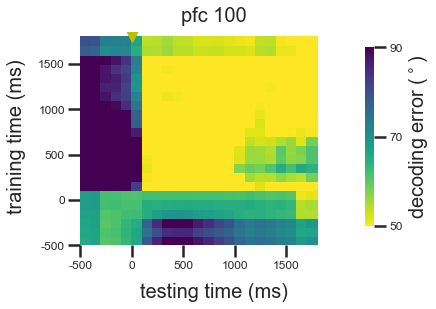

In [149]:
heatmap(train_test, 'pfc 100')

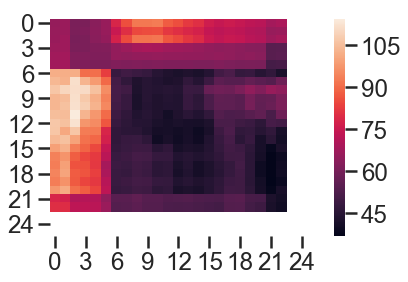

In [142]:
sns.heatmap(train_test)

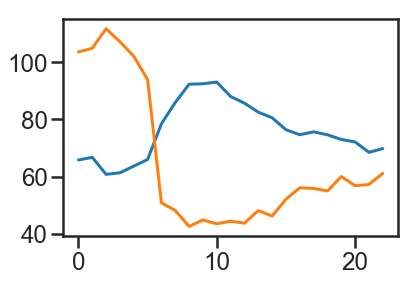

In [144]:
plt.plot(train_test[0, :])

plt.plot(train_test[9, :])

In [127]:
all_times = np.arange(-500,2100, 100)
train_test = np.empty( (len(all_times), len(all_times) ) )
train_test[:] = np.nan
np.shape(train_test)

(26, 26)

In [126]:
train_test

array([[65.81, 65.81, 65.81, 65.81, 65.81, 65.81, 65.81, 65.81, 65.81,
        65.81, 65.81, 65.81, 65.81, 65.81, 65.81, 65.81, 65.81, 65.81,
        65.81, 65.81, 65.81, 65.81, 65.81,   nan,   nan,   nan],
       [66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67,
        66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67,
        66.67, 66.67, 66.67, 66.67, 66.67,   nan,   nan,   nan],
       [60.58, 60.58, 60.58, 60.58, 60.58, 60.58, 60.58, 60.58, 60.58,
        60.58, 60.58, 60.58, 60.58, 60.58, 60.58, 60.58, 60.58, 60.58,
        60.58, 60.58, 60.58, 60.58, 60.58,   nan,   nan,   nan],
       [61.29, 61.29, 61.29, 61.29, 61.29, 61.29, 61.29, 61.29, 61.29,
        61.29, 61.29, 61.29, 61.29, 61.29, 61.29, 61.29, 61.29, 61.29,
        61.29, 61.29, 61.29, 61.29, 61.29,   nan,   nan,   nan],
       [61.83, 61.83, 61.83, 61.83, 61.83, 61.83, 61.83, 61.83, 61.83,
        61.83, 61.83, 61.83, 61.83, 61.83, 61.83, 61.83, 61.83, 61.83,
        61.83, 61.83, 61.83, 6

In [120]:
time_=400

In [118]:
np.arange(-500,2100, 100)

array([-500, -400, -300, -200, -100,    0,  100,  200,  300,  400,  500,
        600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
       1700, 1800, 1900, 2000])

In [122]:
np.where(time_ == all_times )[0][0]

9

In [117]:
dfn = df.loc[df['neuron']==1367701]
dfn = dfn.loc[(dfn['times_centered']>=-500) & (dfn['times_centered']<=2000) ]
list_times = dfn.times_centered.unique()
list_times_sorted =np.sort(list_times)
list_times_sorted

array([-500, -400, -300, -200, -100,    0,  100,  200,  300,  400,  500,
        600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
       1700], dtype=int64)

In [90]:
cross_temp = Parallel(n_jobs = numcores)(delayed(decoder_n)(training, testing)  for training, testing in zip(paralel_train, paralel_test) )   #### reconstruction standard (paralel)


In [97]:
train_test = np.zeros( (len(dfn.times_centered.unique()), len(dfn.times_centered.unique()) ) )


In [108]:
all_times = np.arange(-500,2100, 100)
train_test = np.empty( (len(all_times), len(all_times) ) )
train_test[:] = np.nan
train_test

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, na

In [102]:
dfn.times_centered.unique()

array([-300, -200, -100,    0,  100,  200,  300,  400,  500,  600,  700,
        800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, -500,
       -400, -800, -700, -600], dtype=int64)

In [91]:
cross_temp

[62.01,
 62.19,
 61.83,
 61.86,
 65.4,
 64.84,
 65.39,
 65.51,
 65.69,
 65.59,
 65.47,
 65.21,
 65.1,
 65.01,
 65.58,
 64.78,
 64.11,
 64.45,
 63.72,
 54.41,
 55.26,
 67.91,
 68.26,
 63.04,
 63.32,
 63.35]

In [79]:
cross_temp

[60.78,
 61.33,
 63.65,
 65.99,
 78.49,
 85.95,
 92.35,
 92.52,
 93.1,
 88.06,
 85.72,
 82.57,
 80.6,
 76.42,
 74.66,
 75.67,
 74.64,
 73.01,
 72.12,
 68.5,
 69.8,
 65.81,
 66.74,
 61.21,
 61.07,
 63.08]

In [ ]:
    Reconstructions = Parallel(n_jobs = numcores)(delayed(Representation)(signal, testing_angles, WM, WM_t, ref_angle=180, plot=False, intercept=Inter)  for signal in signal_paralel)    #### reconstruction standard (paralel)
